In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from matplotlib import pyplot as plt

import functions

In [2]:

start_date = '2000-01-01'
end_date = '2025-06-14'
tickers = ['MSFT', 'AMZN', 'GOOG', 'AAPL']
stock_data = yf.download(tickers, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


In [3]:
df = functions.transform_df(stock_data)
df

Close                                            High  \
Ticker            AAPL        AMZN        GOOG        MSFT        AAPL   
Date                                                                     
2000-01-03    0.841048    4.468750         NaN   35.726719    0.845274   
2000-01-04    0.770139    4.096875         NaN   34.519867    0.831186   
2000-01-05    0.781409    3.487500         NaN   34.883839    0.830716   
2000-01-06    0.713787    3.278125         NaN   33.715305    0.803949   
2000-01-07    0.747598    3.478125         NaN   34.155895    0.758868   
...                ...         ...         ...         ...         ...   
2025-06-09  201.449997  216.979996  177.630005  472.750000  206.000000   
2025-06-10  202.669998  217.610001  180.009995  470.920013  204.350006   
2025-06-11  198.779999  213.199997  178.789993  472.619995  204.500000   
2025-06-12  199.199997  213.240005  176.970001  478.869995  199.679993   
2025-06-13  196.449997  212.100006  175.880005  474.959991  200.369995   

                                                       Low              ...  \
Ticker            AMZN        GOOG        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2000-01-03    4.478125         NaN   36.358881    0.764034    3.952344  ...   
2000-01-04    4.575000         NaN   35.899129    0.760277    4.087500  ...   
2000-01-05    3.756250         NaN   35.669252    0.773895    3.400000  ...   
2000-01-06    3.634375         NaN   34.903004    0.713787    3.200000  ...   
2000-01-07    3.525000         NaN   34.404929    0.717544    3.309375  ...   
...                ...         ...         ...         ...         ...  ...   
2025-06-09  217.850006  177.914993  473.429993  200.020004  212.880005  ...   
2025-06-10  217.690002  182.445007  472.799988  200.570007  214.149994  ...   
2025-06-11  218.399994  181.750000  475.470001  198.410004  212.889999  ...   
2025-06-12  213.580002  178.130005  480.420013  197.360001  211.330002  ...   
2025-06-13  214.050003  178.343002  479.179993  195.699997  209.619995  ...   

              cum_max              drawdown                                 \
Ticker           GOOG       MSFT       AAPL      AMZN       GOOG      MSFT   
Date                                                                         
2000-01-03        NaN        NaN        NaN       NaN        NaN       NaN   
2000-01-04        NaN   0.966220   0.000000  0.000000        NaN  0.000000   
2000-01-05        NaN   0.976408   0.000000  0.136364        NaN  0.000000   
2000-01-06        NaN   0.976408   0.080402  0.183217        NaN  0.032708   
2000-01-07        NaN   0.976408   0.040201  0.138462        NaN  0.020375   
...               ...        ...        ...       ...        ...       ...   
2025-06-09  83.411451  13.232393  67.709194  5.612308  11.912314  0.000000   
2025-06-10  83.411451  13.232393  66.258621  5.471328  10.954327  0.051222   
2025-06-11  83.411451  13.232393  70.883804  6.458182  11.445398  0.003639   
2025-06-12  83.411451  13.403694  70.384429  6.449229  12.177976  0.000000   
2025-06-13  83.411451  13.403694  73.654159  6.704334  12.616719  0.109442   

           drawdown_percent                                
Ticker                 AAPL      AMZN      GOOG      MSFT  
Date                                                       
2000-01-03              NaN       NaN       NaN       NaN  
2000-01-04         0.000000  0.000000       NaN  0.000000  
2000-01-05         0.000000  0.148741       NaN  0.000000  
2000-01-06         0.086539  0.199847       NaN  0.033498  
2000-01-07         0.043269  0.151030       NaN  0.020868  
...                     ...       ...       ...       ...  
2025-06-09         0.220385  0.103611  0.142814  0.000000  
2025-06-10         0.215663  0.101008  0.131329  0.003871  
2025-06-11         0.230718  0.119227  0.137216  0.000275  
2025-06-12         0.229092  0.119061  0.145999  0.000000  


Maximum drawdown percent: 0.9290868577417513 
Date: 2001-09-28 00:00:00


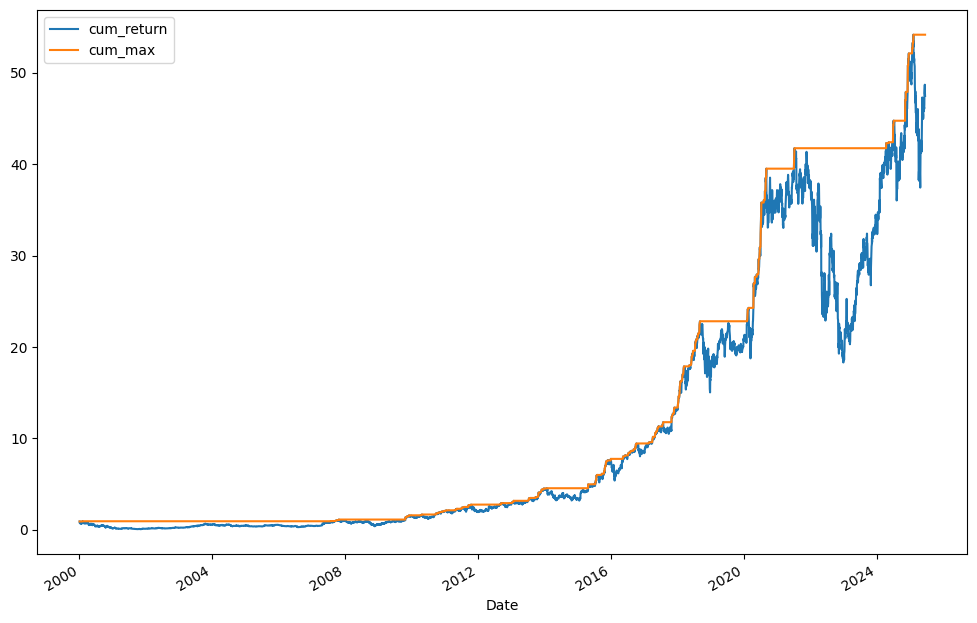

In [4]:
amazon = functions.retrive_single_ticker(df, 'AMZN')
amazon[['cum_return', 'cum_max']].plot(figsize=(12, 8))
print("Maximum drawdown percent:", amazon['drawdown_percent'].max(), "\nDate:", amazon['drawdown_percent'].idxmax())

In [5]:
def plot_drawdown(data, ticker):
    df = functions.retrive_single_ticker(data, ticker)
    df[['cum_return', 'cum_max']].plot(figsize=(12, 8))
    print("Maximum drawdown percent:", df['drawdown_percent'].max(), "\nDate:", df['drawdown_percent'].idxmax())

Maximum drawdown percent: 0.8180144898543944 
Date: 2003-04-17 00:00:00


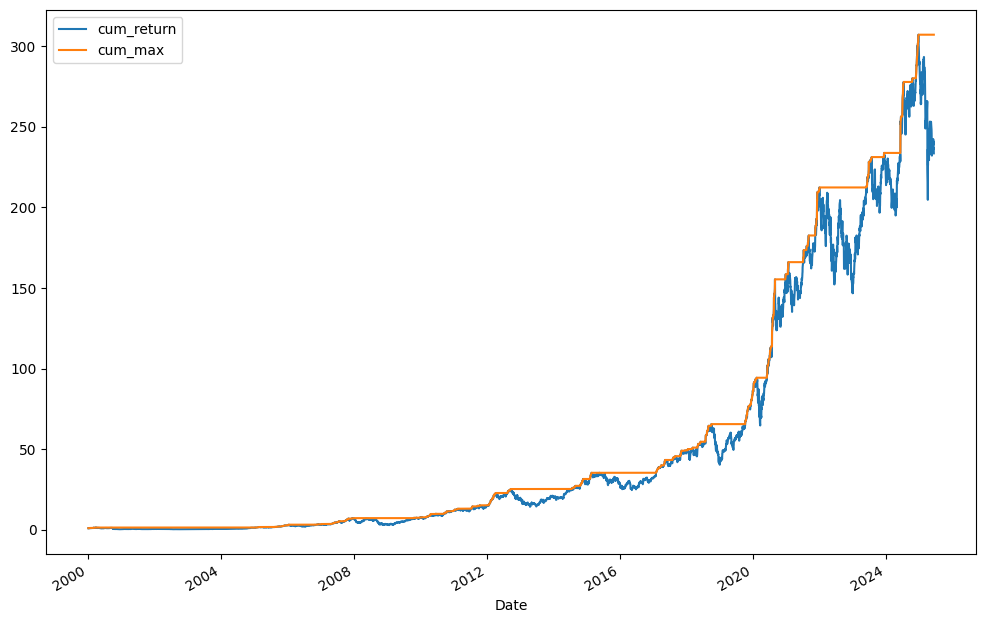

In [6]:
plot_drawdown(df, 'AAPL')

In [7]:
ret = df['Pct_change'].dropna()
ret

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2004-08-20,0.002930,0.022780,0.079430,0.002950
2004-08-23,0.009091,-0.001519,0.010064,0.004425
2004-08-24,0.027993,-0.010139,-0.041408,0.000000
2004-08-25,0.034429,0.032010,0.010775,0.011380
2004-08-26,0.048714,-0.002730,0.018019,-0.003993
...,...,...,...,...
2025-06-09,-0.012113,0.015967,0.016713,0.005038
2025-06-10,0.006056,0.002904,0.013399,-0.003871
2025-06-11,-0.019194,-0.020266,-0.006777,0.003610


In [8]:
summary = ret['2020':].describe().T
summary

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
AAPL,1370.0,0.000954,0.020596,-0.128647,-0.008632,0.001149,0.011956,0.153288
AMZN,1370.0,0.000867,0.022822,-0.140494,-0.011272,0.000680,0.013003,0.135359
GOOG,1370.0,0.000923,0.020601,-0.111008,-0.009663,0.001991,0.011532,0.099652
MSFT,1370.0,0.001025,0.019219,-0.147390,-0.008391,0.001129,0.010789,0.142169


In [9]:
annualized_summary = summary.loc[:, ['mean', 'std']]
annualized_summary['mean'] = annualized_summary['mean'] * 252
annualized_summary['std'] = annualized_summary['std'] * np.sqrt(252)

In [10]:
annualized_summary

,mean,std
Ticker,,
AAPL,0.240525,0.326949
AMZN,0.218405,0.362295
GOOG,0.232585,0.327038
MSFT,0.258262,0.305086


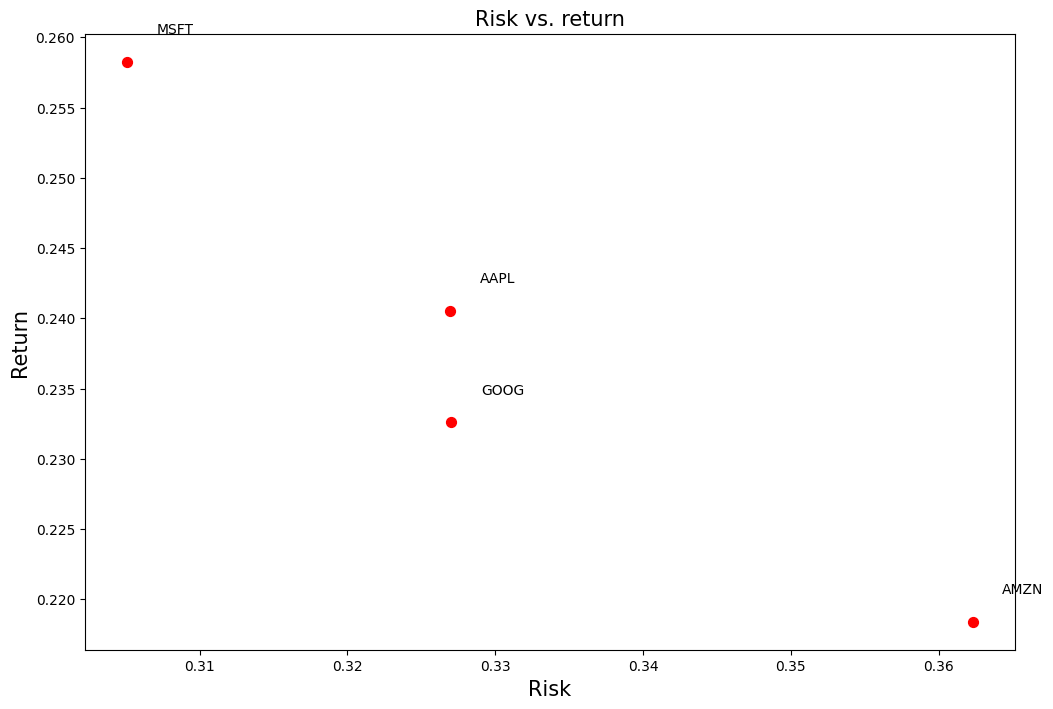

In [11]:
# Plot risk vs return
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

ax.scatter(
    annualized_summary['std'],
    annualized_summary['mean'],
    c='red',
    s=50
    )
for x in annualized_summary.index:
    ax.annotate(x, xy=(annualized_summary['std'][x] + 0.002, annualized_summary['mean'][x] + 0.002))

plt.title("Risk vs. return", fontsize=15)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Return", fontsize=15)
plt.show()

In [12]:
ret = df.xs('AAPL', level=1, axis=1).loc['2020':,'Pct_change'].dropna()
ret.sort_values()

Date
2020-03-16   -0.128647
2020-03-12   -0.098755
2025-04-03   -0.092456
2020-09-03   -0.080061
2020-03-09   -0.079092
                ...   
2020-03-02    0.093101
2020-03-24    0.100325
2020-07-31    0.104689
2020-03-13    0.119808
2025-04-09    0.153288
Name: Pct_change, Length: 1370, dtype: float64

<Axes: ylabel='Frequency'>

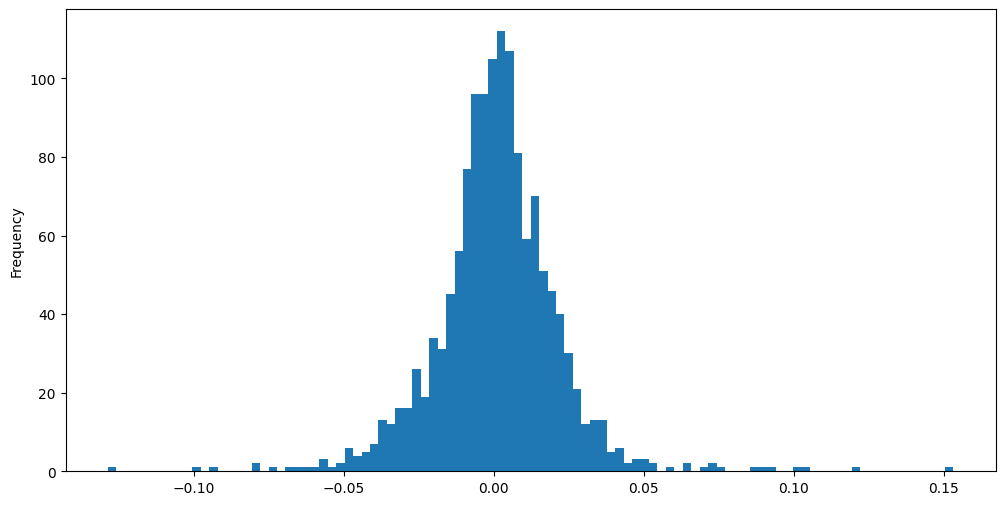

In [13]:
ret.plot(kind='hist', bins=100,figsize=(12, 6))

In [14]:
import plotly.express as px

In [20]:
px.histogram(ret, nbins=100, x='Pct_change')